In [37]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

#### Load and prepare data

In [2]:
production_alerts = pd.read_csv("data/production_alerts_meta_data.csv",sep=";",index_col=0)
production_alerts.head(3)

,store,video_name,label,probability
0,pt-inter-3830-rocha,2023-05-31_20h32m14s_to_2023-05-31_20h32m30s_c...,Other Normal,0.142977
1,pt-inter-3830-rocha,2023-05-31_20h12m46s_to_2023-05-31_20h13m02s_c...,Other Normal,0.371981
2,pt-inter-3830-rocha,2023-05-31_20h39m56s_to_2023-05-31_20h40m12s_c...,Other Normal,0.309365


In [3]:
production_alerts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158136 entries, 0 to 158135
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   store        158136 non-null  object 
 1   video_name   158136 non-null  object 
 2   label        158135 non-null  object 
 3   probability  155937 non-null  float64
dtypes: float64(1), object(3)
memory usage: 6.0+ MB


We observe some NA values, one in labeland several in probability.

In [4]:
production_alerts[production_alerts.probability.isna()]

,store,video_name,label,probability
484,pt-inter-3830-rocha,2023-05-11_20h55m04s_to_2023-05-11_20h55m22s_c...,Other Normal,NaN
488,pt-inter-3830-rocha,2023-05-11_18h42m19s_to_2023-05-11_18h42m36s_c...,Store Normal Bag,NaN
489,pt-inter-3830-rocha,2023-05-11_18h37m11s_to_2023-05-11_18h37m28s_c...,Other Normal,NaN
490,pt-inter-3830-rocha,2023-05-11_18h37m21s_to_2023-05-11_18h37m38s_c...,Other Normal,NaN
491,pt-inter-3830-rocha,2023-05-11_18h37m33s_to_2023-05-11_18h37m50s_c...,Other Normal,NaN
...,...,...,...,...
151004,fr-u-83470-aix,2023-05-13_10h55m39s_to_2023-05-13_10h55m56s_c...,Other Normal,NaN
151005,fr-u-83470-aix,2023-05-13_10h54m52s_to_2023-05-13_10h55m09s_c...,Other Normal,NaN
151006,fr-u-83470-aix,2023-05-13_10h51m03s_to_2023-05-13_10h51m20s_c...,Other Normal,NaN
151007,fr-u-83470-aix,2023-05-13_10h39m03s_to_2023-05-13_10h39m20s_c...,Other Normal,NaN


In [5]:
# Number of stores
len(production_alerts.store.unique())

45

In [7]:
# create camera id variable
production_alerts['CAMERA_ID'] = [i.split("_")[6] for i  in production_alerts['video_name']]
len(production_alerts.CAMERA_ID.unique())

30

We note that thee are 45 stores and 30 cameras id, so we create a variable combining camera id and store.

In [8]:
production_alerts['camera'] = production_alerts.store + '_' + production_alerts['CAMERA_ID']

In [9]:
# create a binary variable for alert: 1 if alert,0 otherwise
alert_labels = ['Suspicious Bag', 'Suspicious', 'Theft', 'Gesture Into Body', 'Product Into Stroller']
production_alerts['alert_binary'] = (production_alerts['label'].isin(alert_labels)).astype(int)

In [34]:
tot_rec = production_alerts[['camera']].value_counts().reset_index().rename(columns={0:'total_records'})
tot_al = production_alerts[['camera','alert_binary']].groupby('camera').sum().reset_index().rename(columns={'alert_binary':'total_alerts'})

In [36]:
summary_alerts = tot_al.merge(tot_rec,on='camera')
summary_alerts['total_alerts_pct'] = (summary_alerts.total_alerts/summary_alerts.total_records)*100

Text(0.5, 0, 'Percentage of alerts')

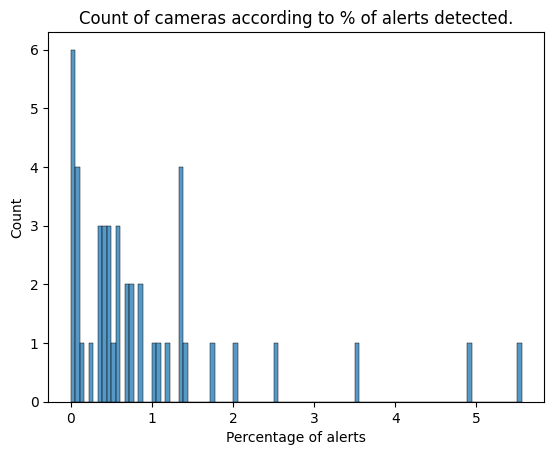

In [42]:
sns.histplot(data=summary_alerts, x="total_alerts_pct",bins=100)
plt.title("Count of cameras according to % of alerts detected")
plt.xlabel("Percentage of alerts")

#### ROC curve for camera with alert

In [48]:
# Get camera with at least one alert
cam_with_alert = production_alerts[production_alerts.alert_binary==1].camera.unique()
len(cam_with_alert)

39

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


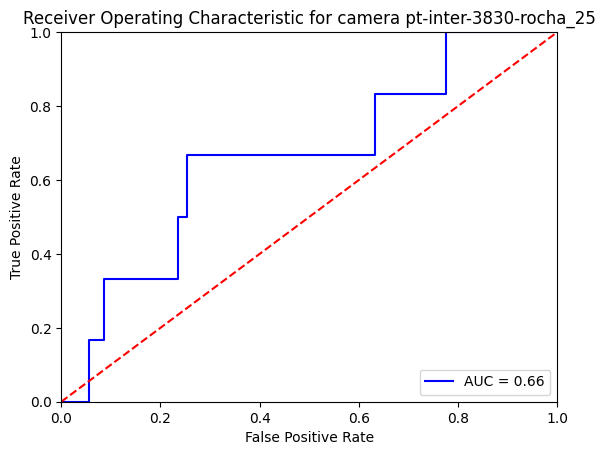

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


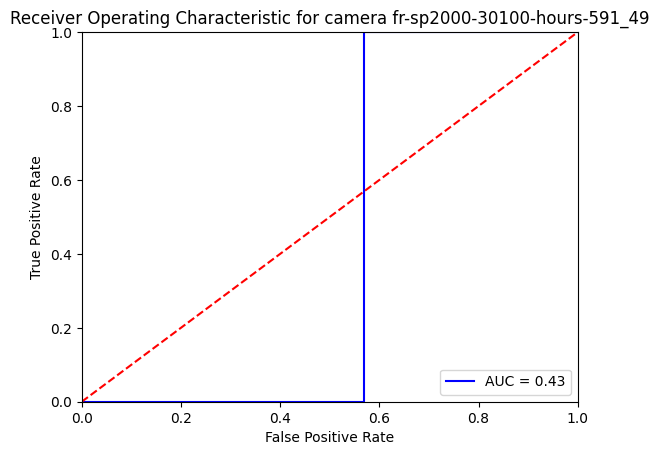

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


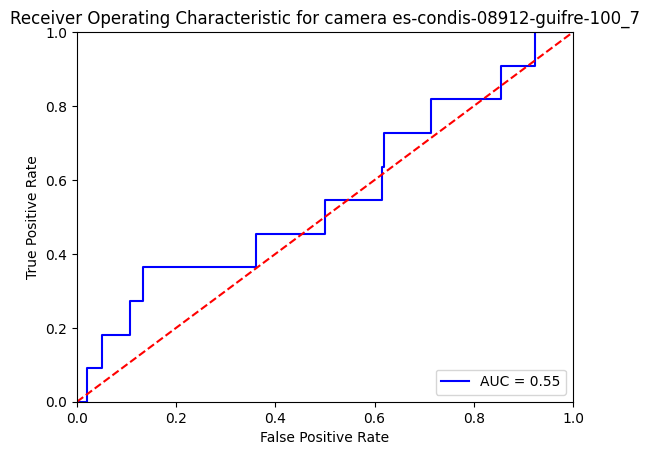

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


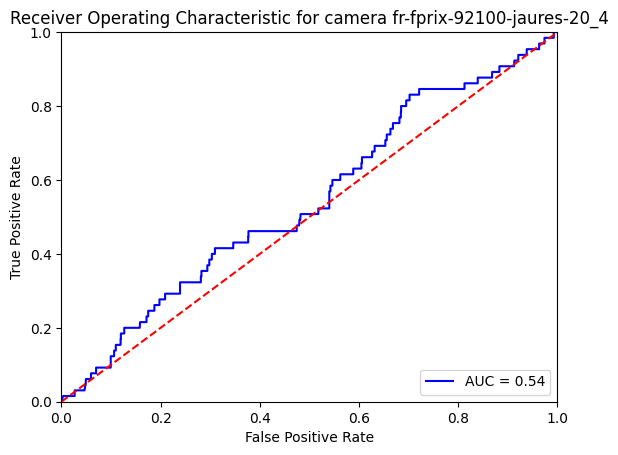

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


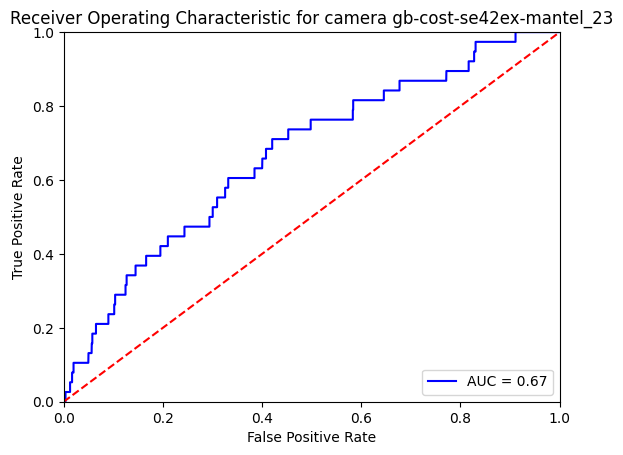

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


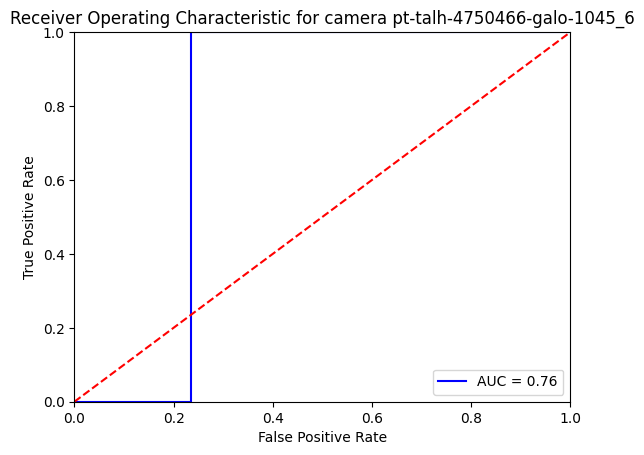

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


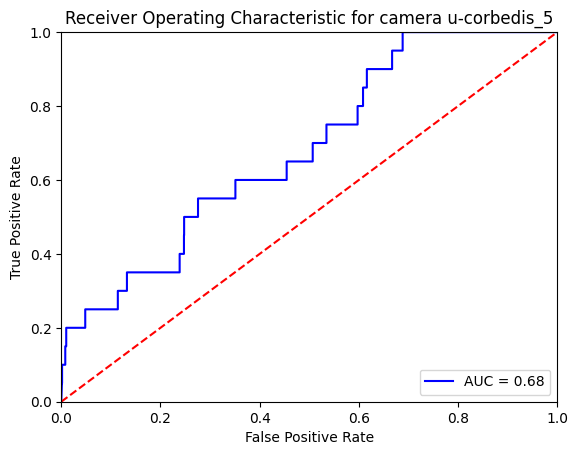

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


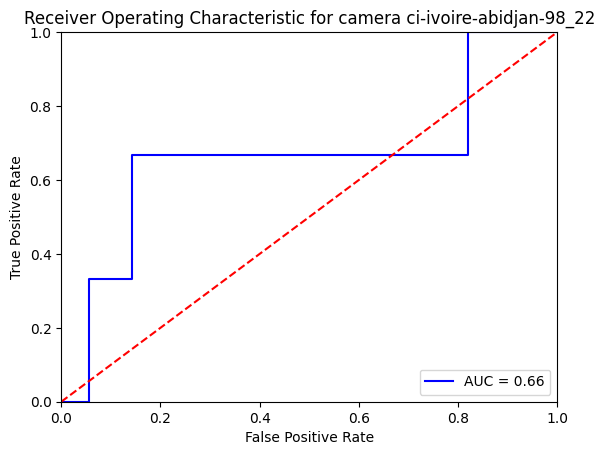

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


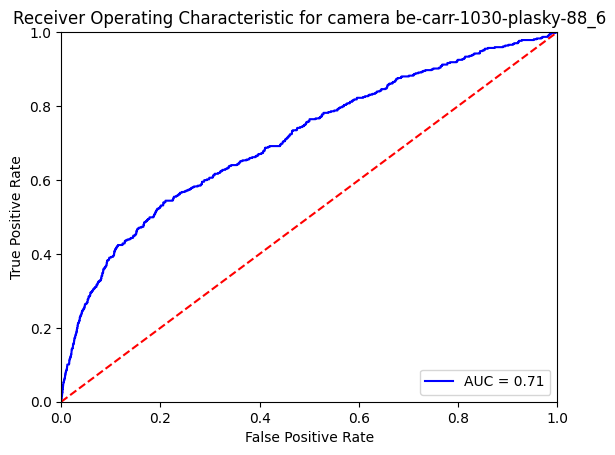

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


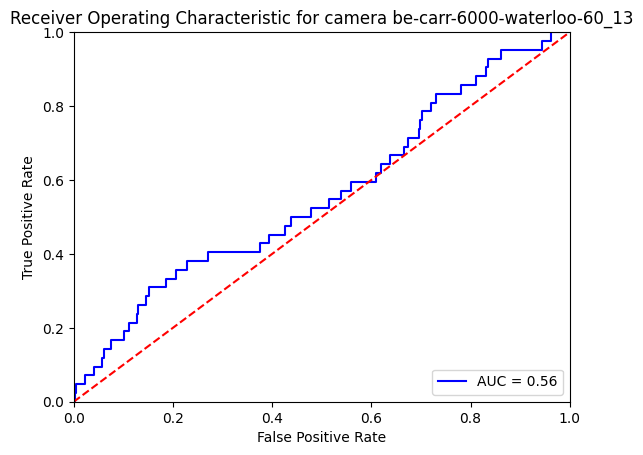

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


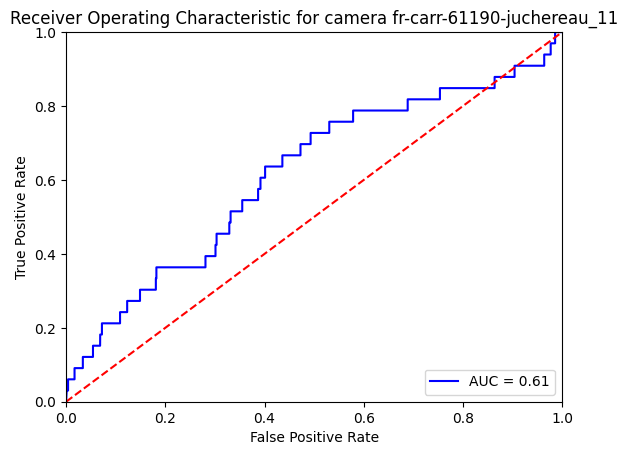

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


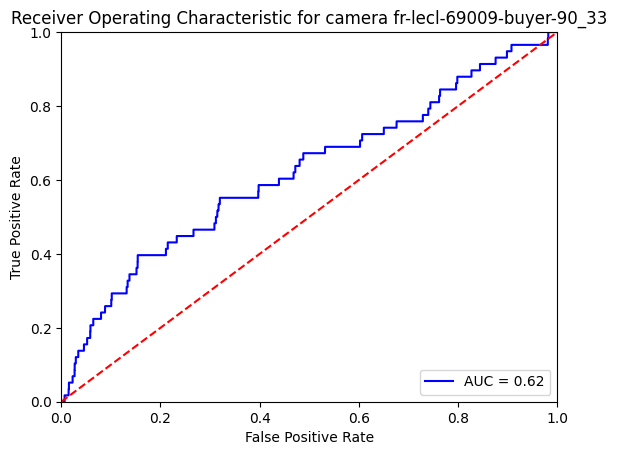

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


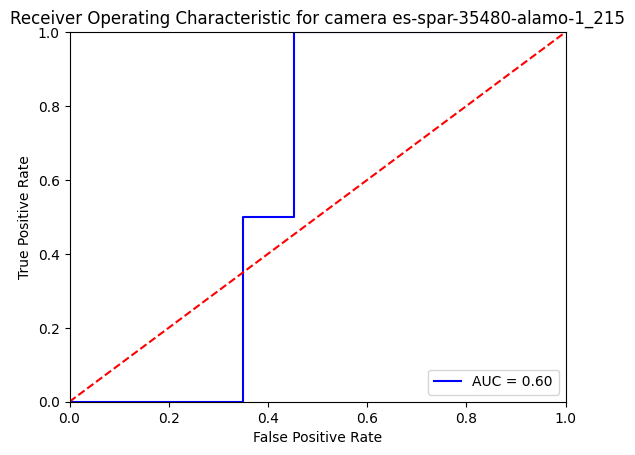

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


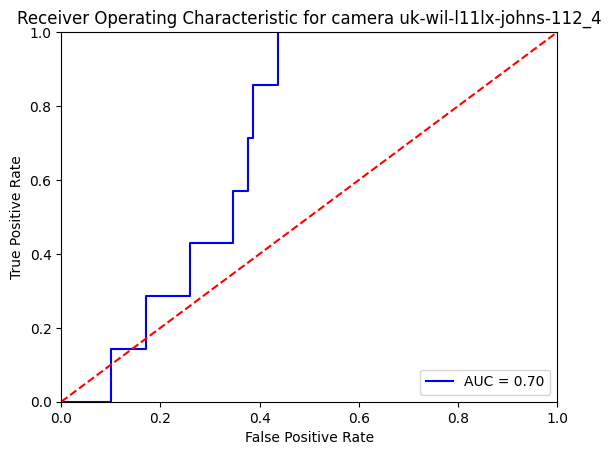

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


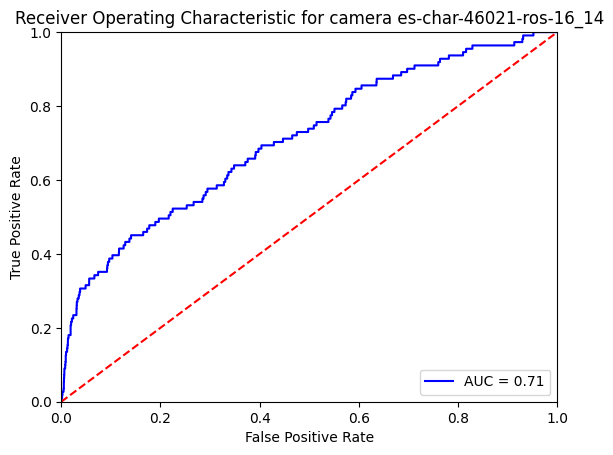

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


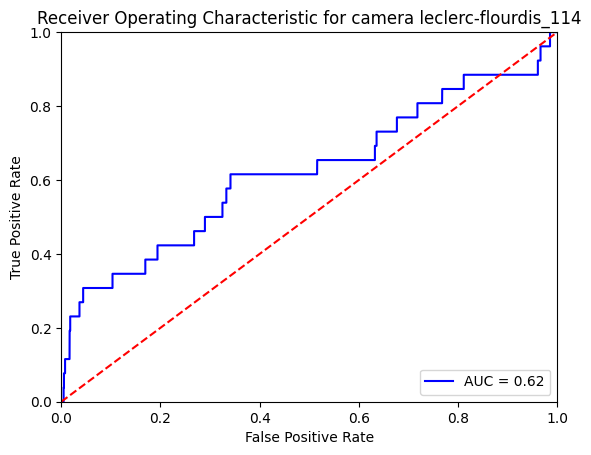

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


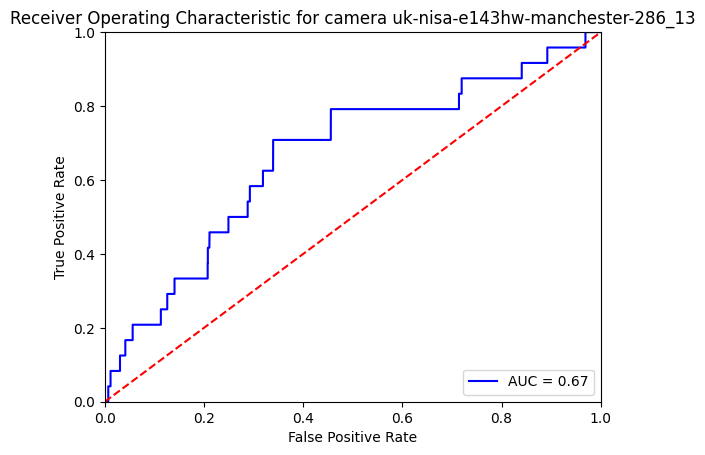

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


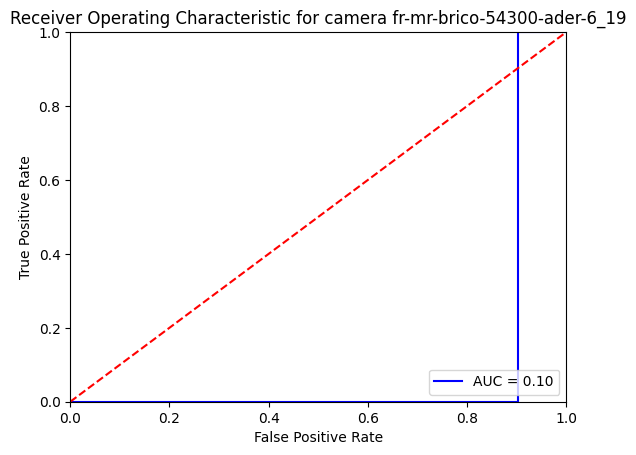

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


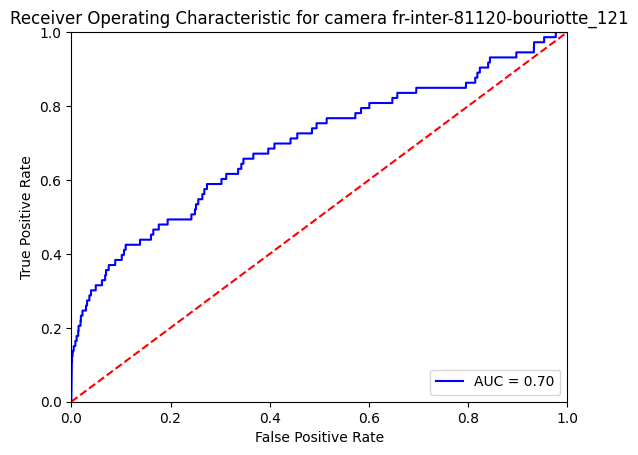

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


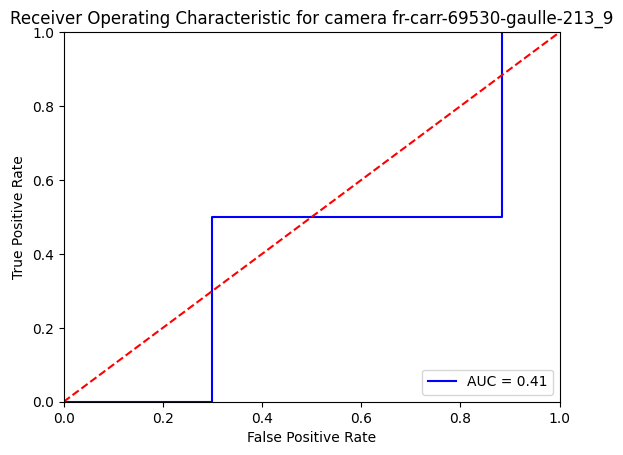

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


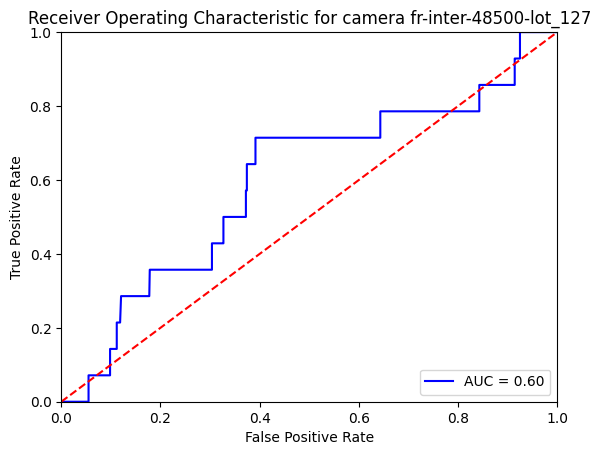

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


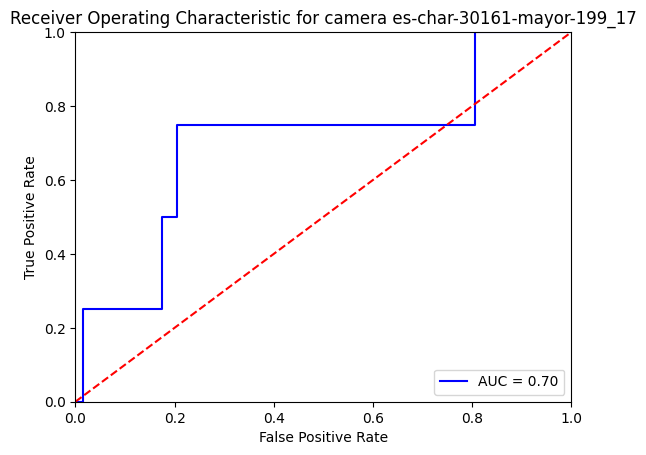

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


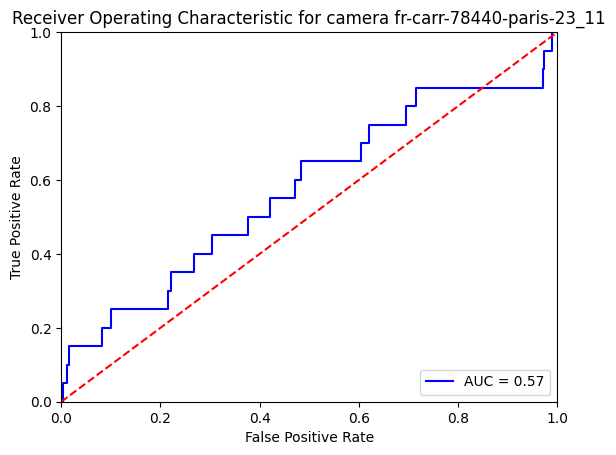

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


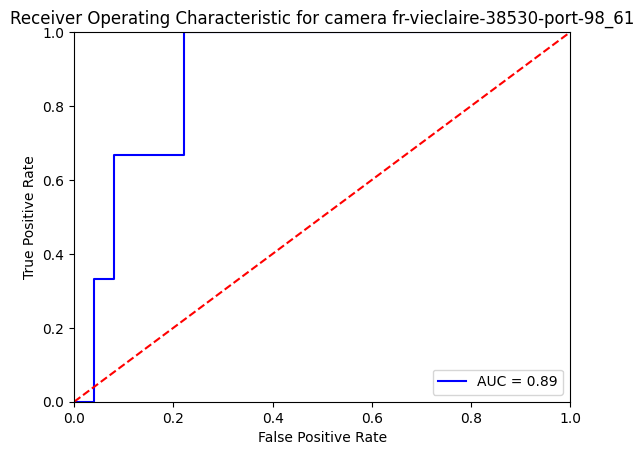

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


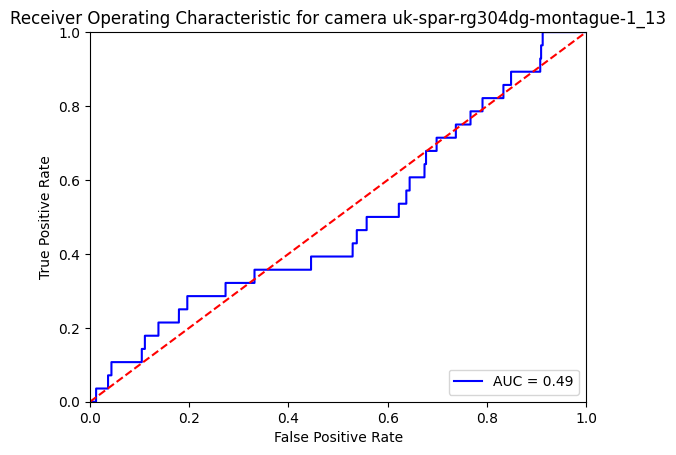

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


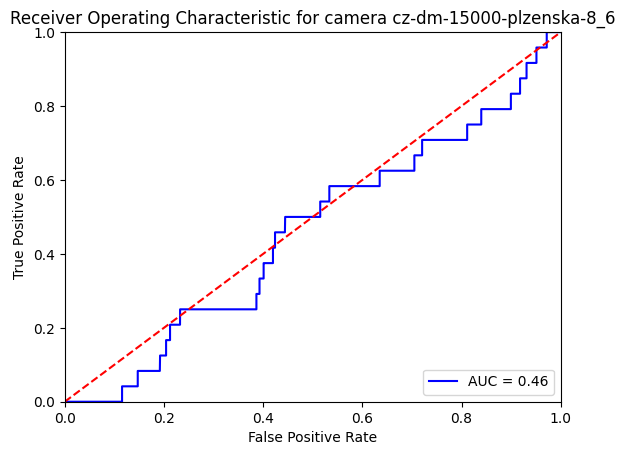

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


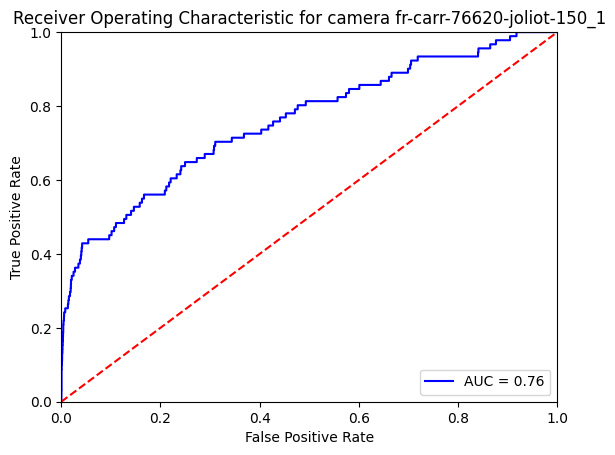

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


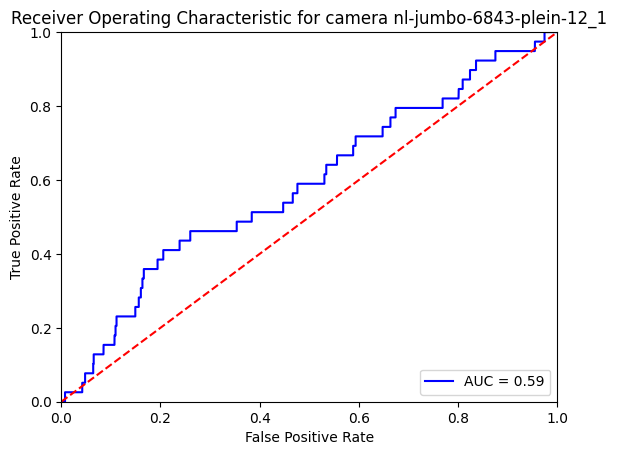

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


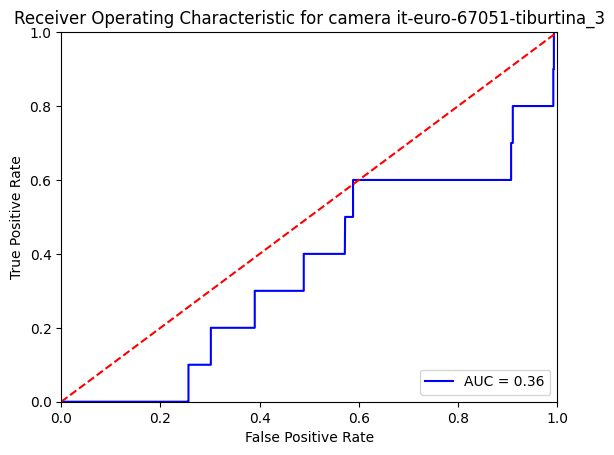

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


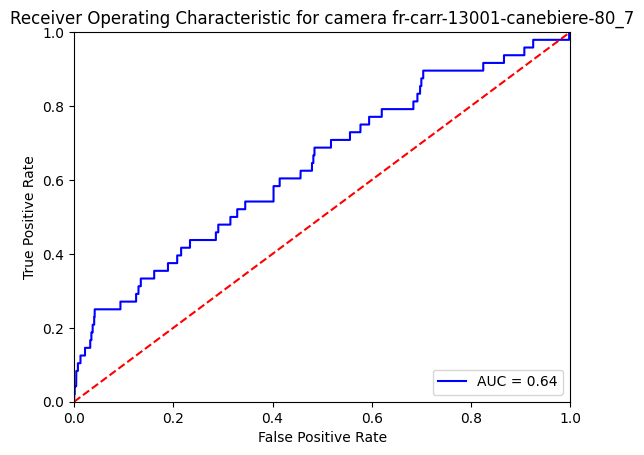

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


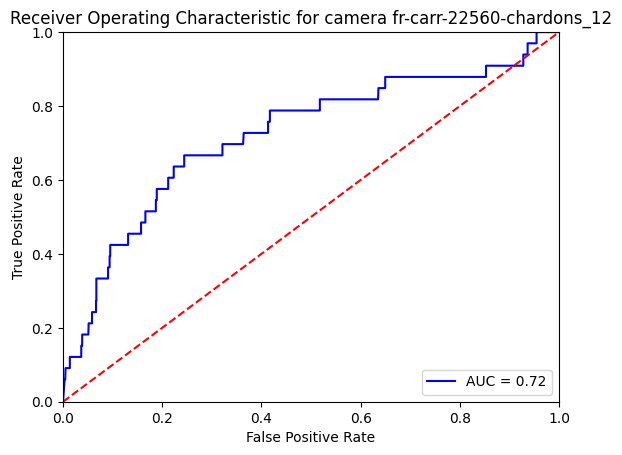

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


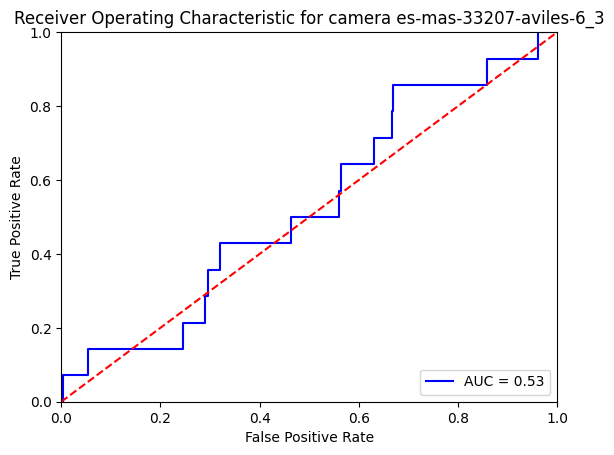

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


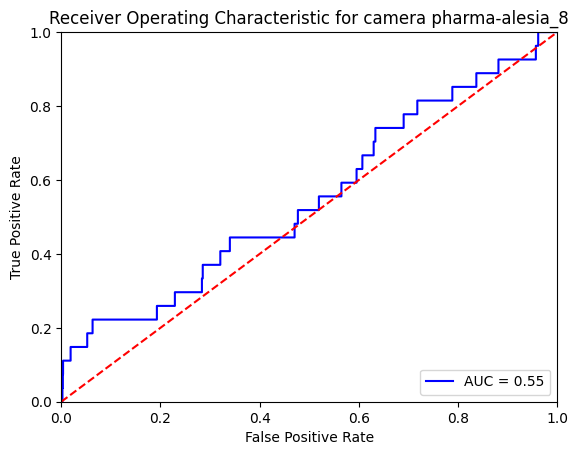

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


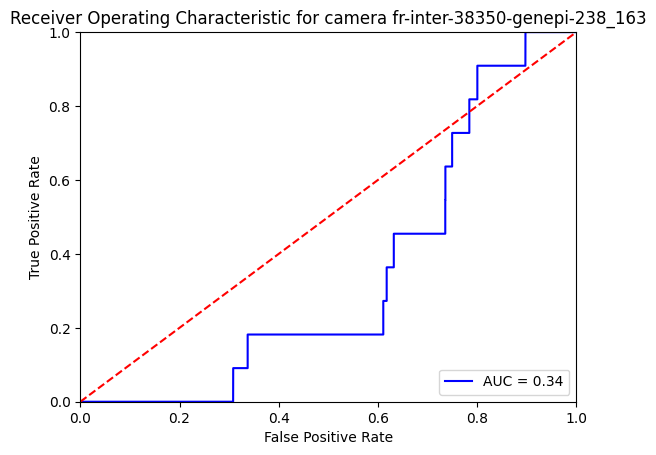

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


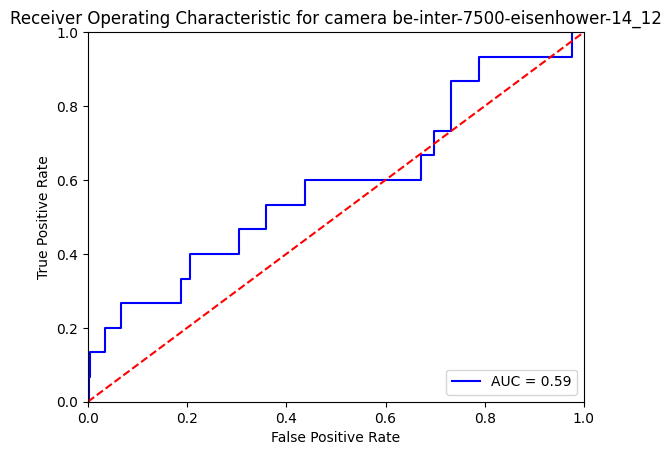

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


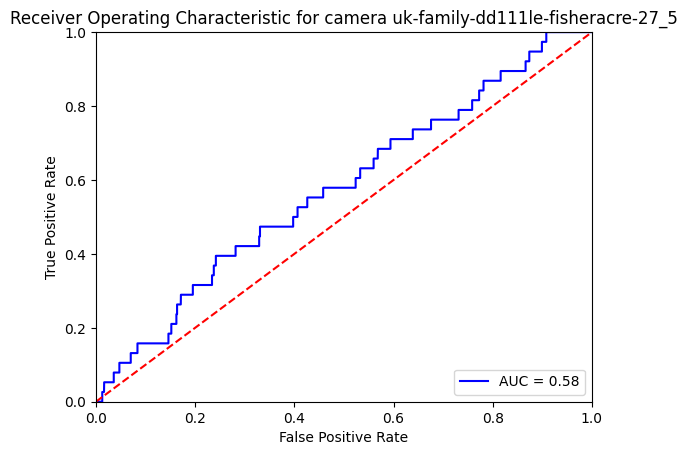

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


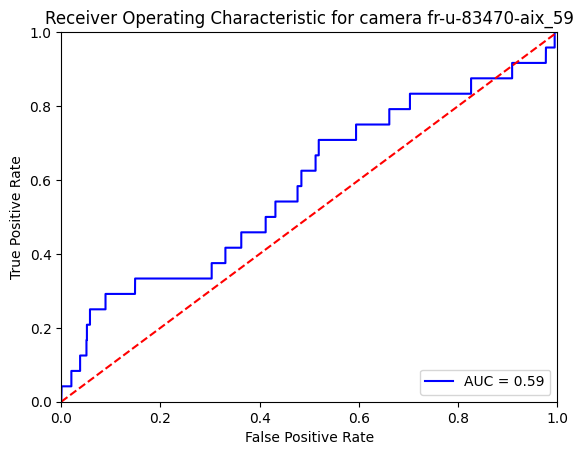

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


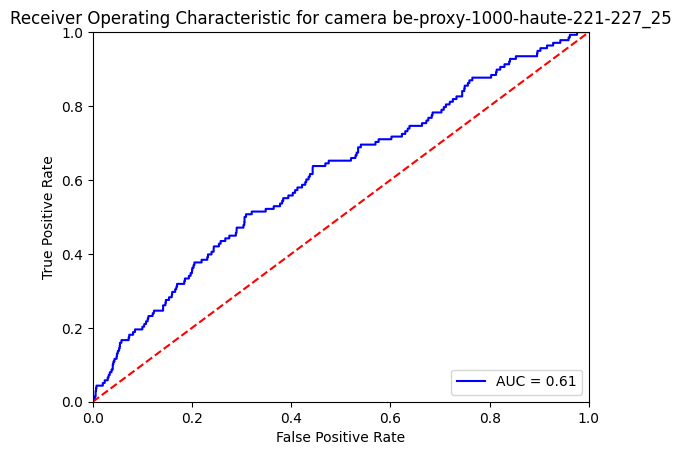

/tmp/ipykernel_36035/1433822792.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod.dropna(inplace=True)


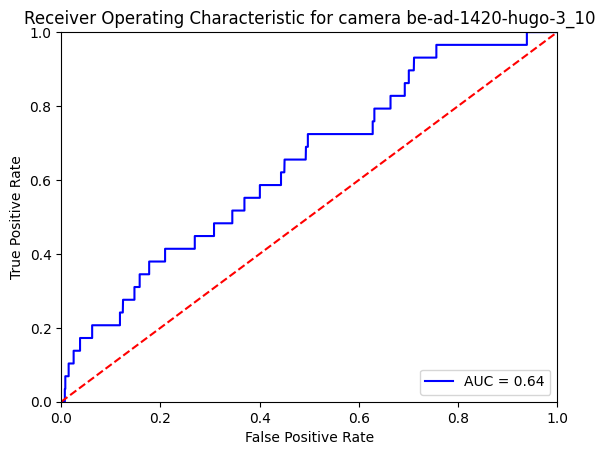

In [50]:
production_alerts_1 = production_alerts[production_alerts.camera.isin(cam_with_alert)]
roc_auc_dict = {}
for cam in production_alerts_1.camera.unique():
    prod = production_alerts_1[production_alerts_1.camera==cam]
    prod.dropna(inplace=True)
    y = np.array(prod.alert_binary)
    scores = np.array(prod.probability)
    fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
    roc_auc = metrics.auc(fpr, tpr)
    roc_auc_dict[cam] = roc_auc
    plt.title('Receiver Operating Characteristic for camera '+cam)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.savefig('results/roc_'+cam+'.png')
    plt.show()

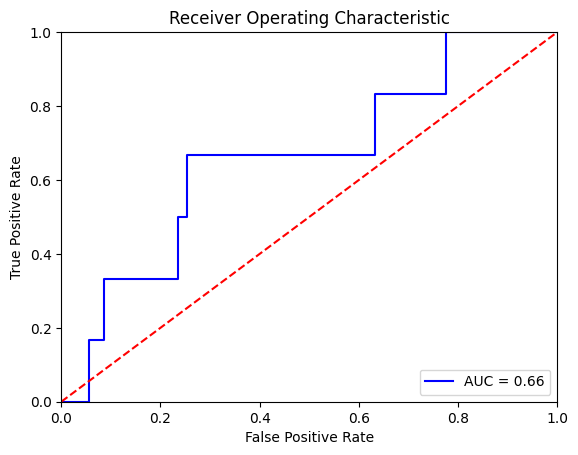

In [59]:
roc_auc_df = pd.DataFrame(list(roc_auc_dict.values()))
roc_auc_df.describe()

,0
count,39.000000
mean,0.594203
std,0.137439
min,0.096714
25%,0.552795
50%,0.612832
75%,0.676023
max,0.886212


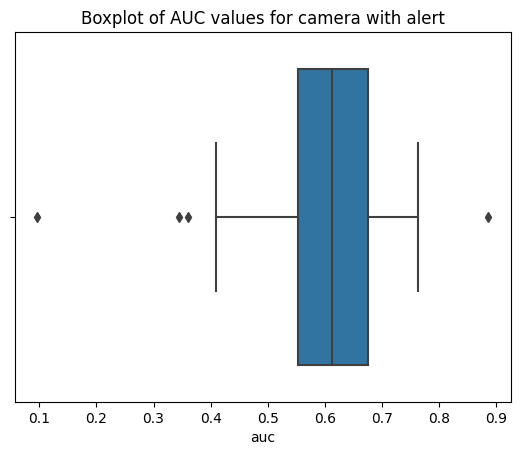

In [63]:
sns.boxplot(x=roc_auc_df[0])
plt.title('Boxplot of AUC values for camera with alert')
plt.xlabel('auc')
plt.savefig('results/boxplot_auc.png')

In [68]:
# Best performance for:
best_cam = max(roc_auc_dict, key=roc_auc_dict.get)
print(best_cam,': ',roc_auc_dict[best_cam])

fr-vieclaire-38530-port-98_61 :  0.8862115127175367


In [69]:
# Worst performance for:
worst_cam = min(roc_auc_dict, key=roc_auc_dict.get)
print(worst_cam,': ',roc_auc_dict[worst_cam])

fr-mr-brico-54300-ader-6_19 :  0.09671419714817109
